In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
mit_df= pd.read_csv('Metro_Interstate_Traffic_Volume.csv')


In [3]:

mit_df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
print(mit_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None


In [5]:
print(mit_df.describe())

               temp       rain_1h       snow_1h    clouds_all  traffic_volume
count  48204.000000  48204.000000  48204.000000  48204.000000    48204.000000
mean     281.205870      0.334264      0.000222     49.362231     3259.818355
std       13.338232     44.789133      0.008168     39.015750     1986.860670
min        0.000000      0.000000      0.000000      0.000000        0.000000
25%      272.160000      0.000000      0.000000      1.000000     1193.000000
50%      282.450000      0.000000      0.000000     64.000000     3380.000000
75%      291.806000      0.000000      0.000000     90.000000     4933.000000
max      310.070000   9831.300000      0.510000    100.000000     7280.000000


In [6]:
# Data Cleaning

In [7]:
# Checking for missing values
print(mit_df.isnull().sum())

holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64


In [8]:
dup_rows=mit_df.duplicated()
num_dup_rows=dup_rows.sum()

print("Number of duplicate rows:", num_dup_rows)

Number of duplicate rows: 17


In [9]:
# duplicate rows
mit_df.drop_duplicates(inplace=True)

print("Remaining rows after removing duplicates:", len(mit_df))


Remaining rows after removing duplicates: 48187


In [10]:
mit_df['holiday'] = mit_df['holiday'].apply(lambda x: 0 if x == 'None' else 1)

holiday_data = mit_df['holiday']
traffic_volume_data = mit_df['traffic_volume']

holiday_counts = holiday_data.value_counts()
holiday_traffic = mit_df.groupby('holiday')['traffic_volume'].mean()
non_holiday_traffic = traffic_volume_data[holiday_data == 0]

print("Holiday Frequencies:")
print(holiday_counts)
print("Traffic Volume on Holidays:")
print(holiday_traffic)
print("Traffic Volume on Non-Holidays:")
print(non_holiday_traffic.describe())


Holiday Frequencies:
holiday
1    48187
Name: count, dtype: int64
Traffic Volume on Holidays:
holiday
1    3259.618134
Name: traffic_volume, dtype: float64
Traffic Volume on Non-Holidays:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: traffic_volume, dtype: float64


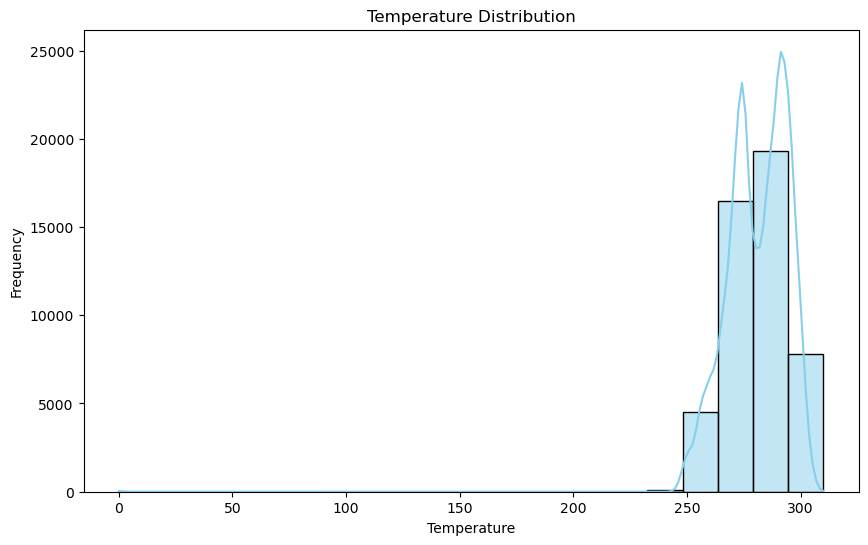

In [11]:
temperature_data =mit_df['temp']
traffic_volume_data =mit_df['traffic_volume']

plt.figure(figsize=(10, 6))
sns.histplot(temperature_data, bins=20, kde=True, color='skyblue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


In [12]:
# Descriptive Statistics
mean_temp = temperature_data.mean()
median_temp = temperature_data.median()
range_temp = temperature_data.max() - temperature_data.min()
quartiles_temp = temperature_data.quantile([0.25, 0.5, 0.75])

print("Mean:", mean_temp)
print("Median:", median_temp)
print("Range:", range_temp)
print("Quartiles:")
print(quartiles_temp)

Mean: 281.20499450059145
Median: 282.45
Range: 310.07
Quartiles:
0.25    272.160
0.50    282.450
0.75    291.806
Name: temp, dtype: float64


In [13]:
# Correlation
correlation = temperature_data.corr(traffic_volume_data)
print("Correlation between Temperature and Traffic Volume:", correlation)

Correlation between Temperature and Traffic Volume: 0.13016125864724504


In [14]:
rain_data =mit_df['rain_1h']
traffic_volume_data =mit_df['traffic_volume']

num_rainy_days = (rain_data > 0).sum()
total_precipitation = rain_data.sum()
average_precipitation_per_day = total_precipitation / num_rainy_days

print("Number of Rainy Days:", num_rainy_days)
print("Total Precipitation:", total_precipitation)
print("Average Precipitation per Rainy Day:", average_precipitation_per_day)



Number of Rainy Days: 3467
Total Precipitation: 16112.859999999997
Average Precipitation per Rainy Day: 4.647493510239399


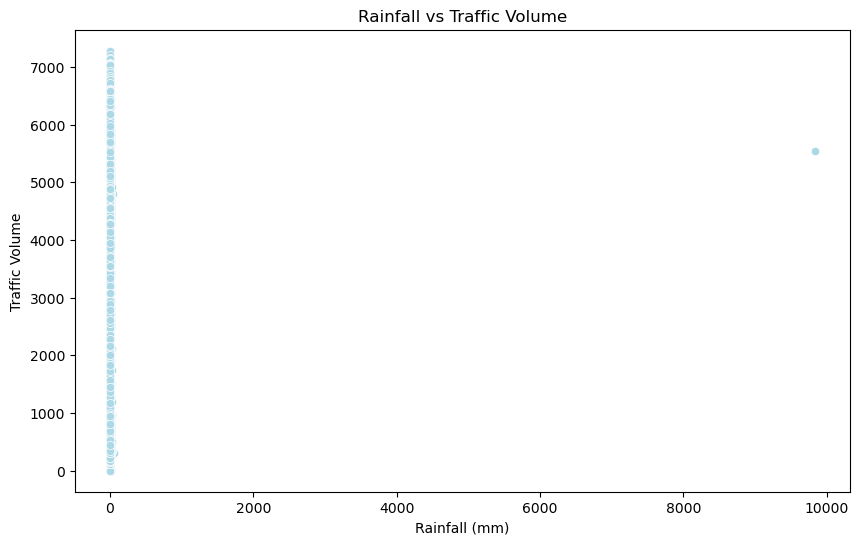

In [15]:
# Impact on Traffic Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rain_data, y=traffic_volume_data, color='lightblue')
plt.title('Rainfall vs Traffic Volume')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Traffic Volume')
plt.show()

In [16]:
# removing rain outliers
Q1 = rain_data.quantile(0.25)
Q3 = rain_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
mit_cleaned_data =mit_df[mit_df['rain_1h'] <= upper_bound]

print("Number of rows before removing outliers:", len(mit_df))
print("Number of rows after removing outliers:", len(mit_cleaned_data))


Number of rows before removing outliers: 48187
Number of rows after removing outliers: 44720


Summary statistics for zero znowfall:
count    48124.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: snow_1h, dtype: float64
Summary Statistics for non-zero snowfall:
count    63.000000
mean      0.170159
std       0.149941
min       0.050000
25%       0.060000
50%       0.100000
75%       0.250000
max       0.510000
Name: snow_1h, dtype: float64


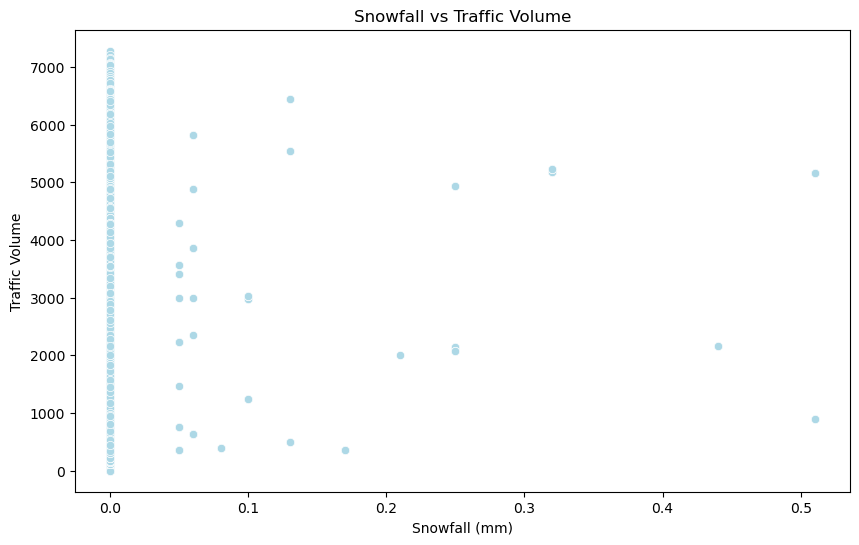

In [17]:
snow_data = mit_df['snow_1h']
traffic_vol_data = mit_df['traffic_volume']

zero_snowfall_data = snow_data[snow_data == 0]
non_zero_snowfall_data = snow_data[snow_data > 0]

print("Summary statistics for zero znowfall:")
print(zero_snowfall_data.describe())

print("Summary Statistics for non-zero snowfall:")
print(non_zero_snowfall_data.describe())

# Impact on trafic volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x=snow_data, y=traffic_vol_data, color='lightblue')
plt.title('Snowfall vs Traffic Volume')
plt.xlabel('Snowfall (mm)')
plt.ylabel('Traffic Volume')
plt.show()




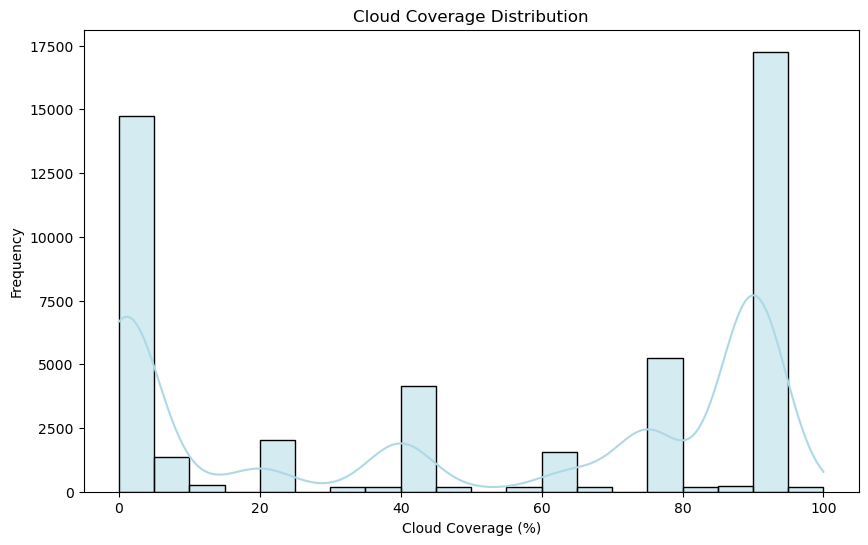

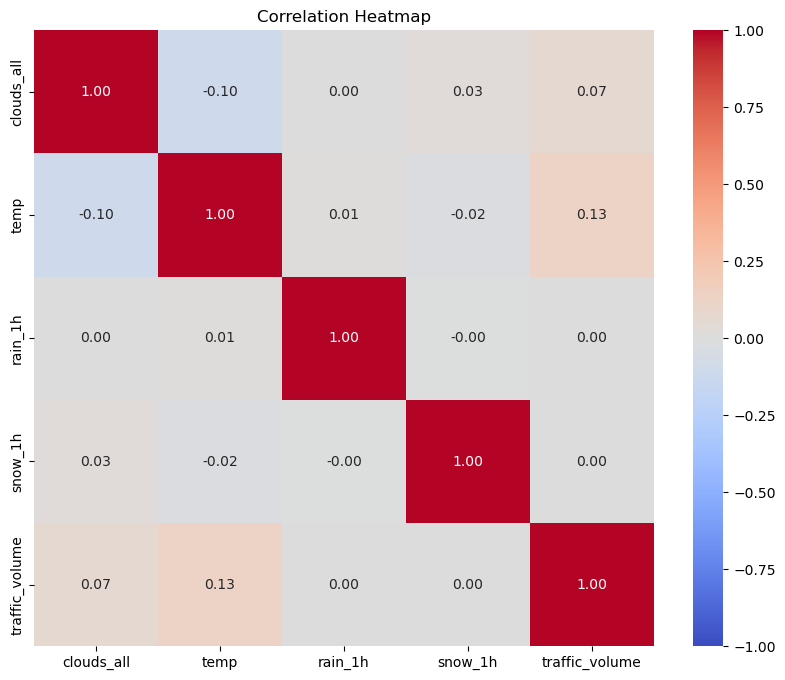

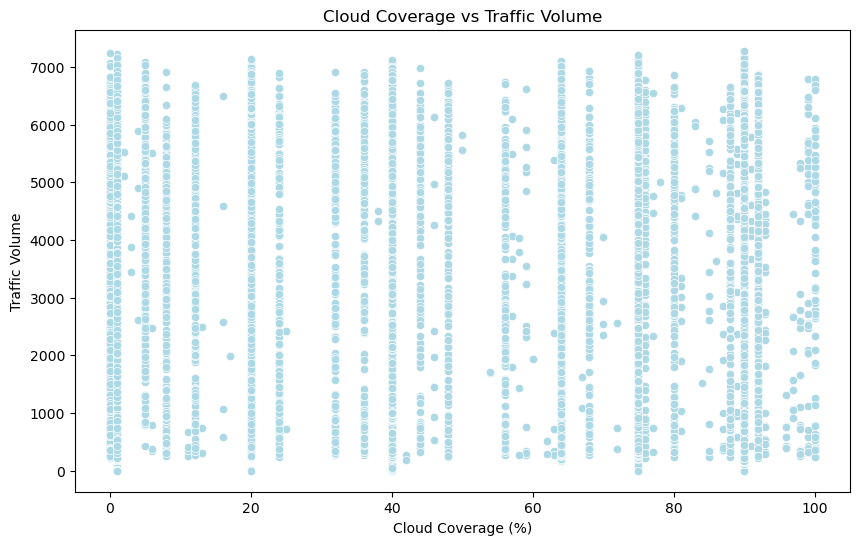

In [18]:

cloud_coverage_data = mit_df['clouds_all']
weather_data = mit_df[['temp', 'rain_1h', 'snow_1h']]
traffic_volume_data = mit_df['traffic_volume']

plt.figure(figsize=(10, 6))
sns.histplot(cloud_coverage_data, bins=20, kde=True, color='lightblue')
plt.title('Cloud Coverage Distribution')
plt.xlabel('Cloud Coverage (%)')
plt.ylabel('Frequency')
plt.show()


correlation_matrix = pd.concat([cloud_coverage_data, weather_data, traffic_volume_data], axis=1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Visualize Correlation with Traffic Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cloud_coverage_data, y=traffic_volume_data, color='lightblue')
plt.title('Cloud Coverage vs Traffic Volume')
plt.xlabel('Cloud Coverage (%)')
plt.ylabel('Traffic Volume')
plt.show()


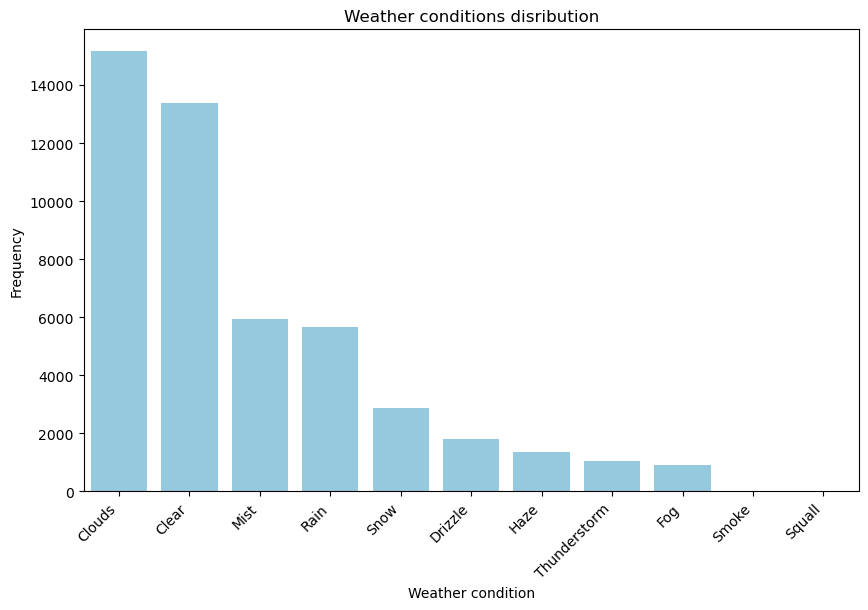

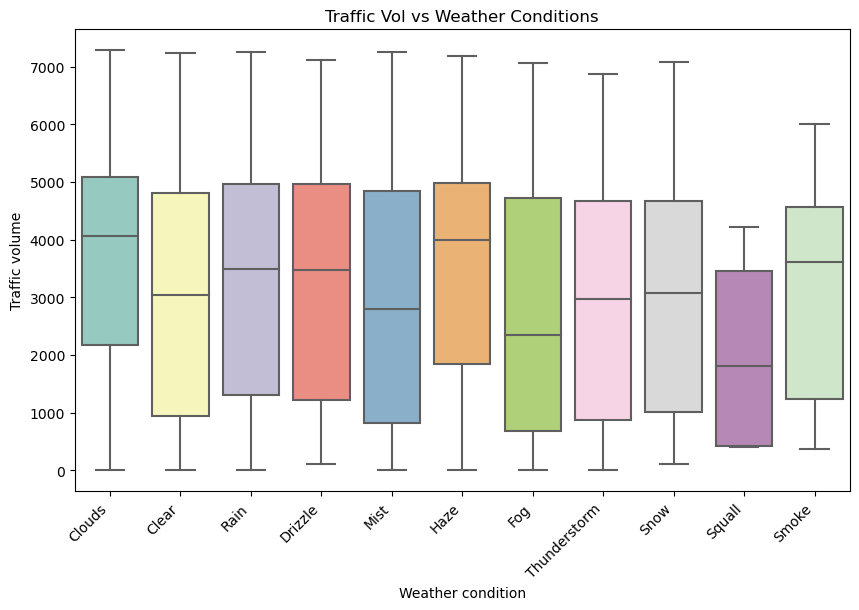

In [19]:

weather_data = mit_df['weather_main']
traffic_vol_data = mit_df['traffic_volume']

weather_counts = weather_data.value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=weather_counts.index, y=weather_counts.values, color='skyblue')
plt.title('Weather conditions disribution')
plt.xlabel('Weather condition')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='weather_main', y='traffic_volume', data=mit_df, palette='Set3')
plt.title('Traffic Vol vs Weather Conditions')
plt.xlabel('Weather condition')
plt.ylabel('Traffic volume')
plt.xticks(rotation=45, ha='right')
plt.show()


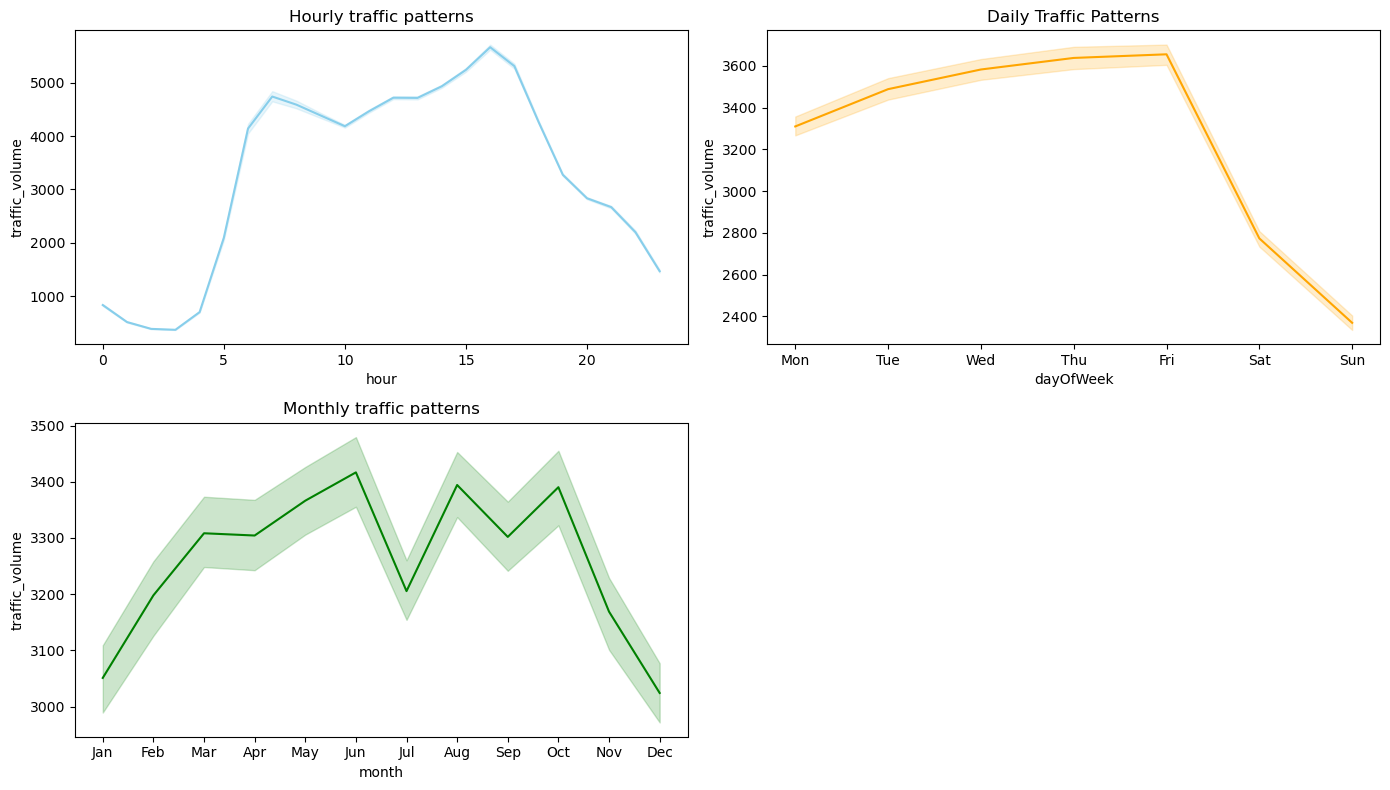

In [20]:

mit_df['date_time'] = pd.to_datetime(mit_df['date_time'])

mit_df['hour'] =mit_df['date_time'].dt.hour
mit_df['dayOfWeek'] =mit_df['date_time'].dt.dayofweek
mit_df['month'] =mit_df['date_time'].dt.month

plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.lineplot(x='hour', y='traffic_volume',data=mit_df,estimator='mean',color='skyblue')
plt.title('Hourly traffic patterns')

plt.subplot(2, 2, 2)
sns.lineplot(x='dayOfWeek', y='traffic_volume',data=mit_df, estimator='mean',color='orange')
plt.title('Daily Traffic Patterns')
plt.xticks(ticks=range(7), labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

plt.subplot(2, 2, 3)
sns.lineplot(x='month', y='traffic_volume', data=mit_df, estimator='mean', color='green')
plt.title('Monthly traffic patterns')
plt.xticks(ticks=range(1, 13), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

plt.tight_layout()
plt.show()


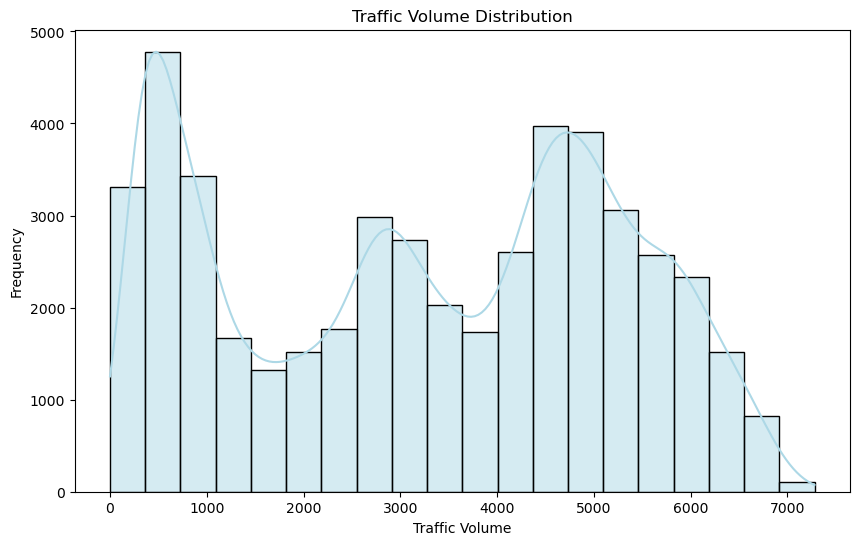

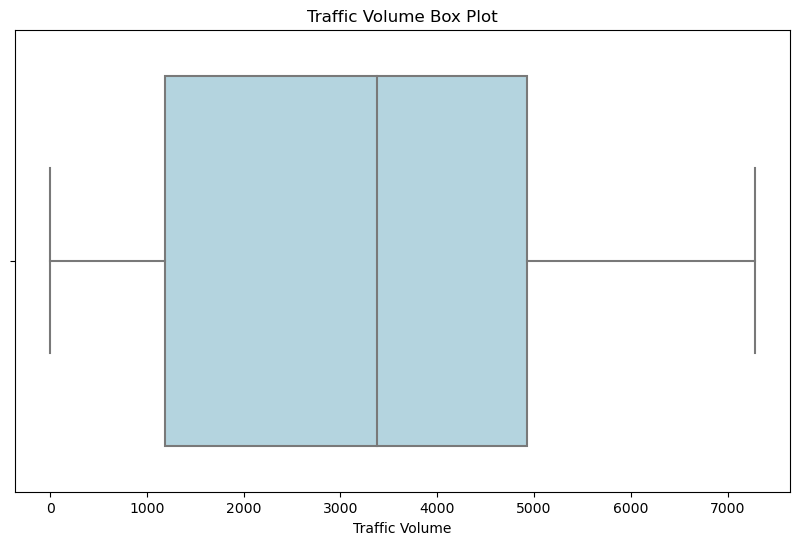

In [21]:

traffic_vol_data = mit_df['traffic_volume']

plt.figure(figsize=(10, 6))
sns.histplot(traffic_vol_data, bins=20, kde=True, color='lightblue')
plt.title('Traffic Volume Distribution')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

# Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=traffic_vol_data, color='lightblue')
plt.title('Traffic Volume Box Plot')
plt.xlabel('Traffic Volume')
plt.show()


In [22]:

mit_df['hour'] = mit_df['date_time'].dt.hour


In [23]:
# One-hot encoding the categorical variables
mit_df_encoded=pd.get_dummies(mit_df, columns=['holiday','weather_main','weather_description'])

mit_df_encoded.head()


,temp,rain_1h,snow_1h,clouds_all,date_time,traffic_volume,hour,dayOfWeek,month,holiday_1,...,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain
0,288.28,0.0,0.0,40,2012-10-02 09:00:00,5545,9,1,10,True,...,False,False,False,False,False,False,False,False,False,False
1,289.36,0.0,0.0,75,2012-10-02 10:00:00,4516,10,1,10,True,...,False,False,False,False,False,False,False,False,False,False
2,289.58,0.0,0.0,90,2012-10-02 11:00:00,4767,11,1,10,True,...,False,False,False,False,False,False,False,False,False,False
3,290.13,0.0,0.0,90,2012-10-02 12:00:00,5026,12,1,10,True,...,False,False,False,False,False,False,False,False,False,False
4,291.14,0.0,0.0,75,2012-10-02 13:00:00,4918,13,1,10,True,...,False,False,False,False,False,False,False,False,False,False


In [24]:
mit_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48187 entries, 0 to 48203
Data columns (total 59 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   temp                                                     48187 non-null  float64       
 1   rain_1h                                                  48187 non-null  float64       
 2   snow_1h                                                  48187 non-null  float64       
 3   clouds_all                                               48187 non-null  int64         
 4   date_time                                                48187 non-null  datetime64[ns]
 5   traffic_volume                                           48187 non-null  int64         
 6   hour                                                     48187 non-null  int32         
 7   dayOfWeek                                             

In [25]:
mit_df_encoded=mit_df_encoded.drop('date_time', axis=1)

In [26]:
mit_df_encoded=mit_df_encoded.astype(int)

In [27]:

mit_df_encoded.to_csv('Python_Preprocessed_Metro_Interstate_Traffic_Volume.csv',index=True)

In [28]:
mit_df_encoded

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,dayOfWeek,month,holiday_1,weather_main_Clear,...,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain
0,288,0,0,40,5545,9,1,10,1,0,...,0,0,0,0,0,0,0,0,0,0
1,289,0,0,75,4516,10,1,10,1,0,...,0,0,0,0,0,0,0,0,0,0
2,289,0,0,90,4767,11,1,10,1,0,...,0,0,0,0,0,0,0,0,0,0
3,290,0,0,90,5026,12,1,10,1,0,...,0,0,0,0,0,0,0,0,0,0
4,291,0,0,75,4918,13,1,10,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,283,0,0,75,3543,19,6,9,1,0,...,0,0,0,0,0,0,0,0,0,0
48200,282,0,0,90,2781,20,6,9,1,0,...,0,0,0,0,0,0,0,0,0,0
48201,282,0,0,90,2159,21,6,9,1,0,...,0,0,0,0,0,0,0,0,0,0
48202,282,0,0,90,1450,22,6,9,1,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = mit_df_encoded.drop('traffic_volume', axis=1)
y = mit_df_encoded['traffic_volume']


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [31]:

y_pred = rf_model.predict(X_test)

In [32]:

mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R^2: {r2_rf}")

Random Forest MSE: 206942.96785904426
Random Forest R^2: 0.9483041990774654


In [33]:
import numpy as np
from sklearn.metrics import mean_absolute_error
# RMSE
rmse_rf = np.sqrt(mse_rf)

# MAE
mae_rf = mean_absolute_error(y_test, y_pred)
print(f"Root Mean squared error (RMSE): {rmse_rf}")
print(f"Mean Absolut error (MAE): {mae_rf}")

Root Mean Squared Error (RMSE): 454.909845858544
Mean Absolute Error (MAE): 260.9618103090411


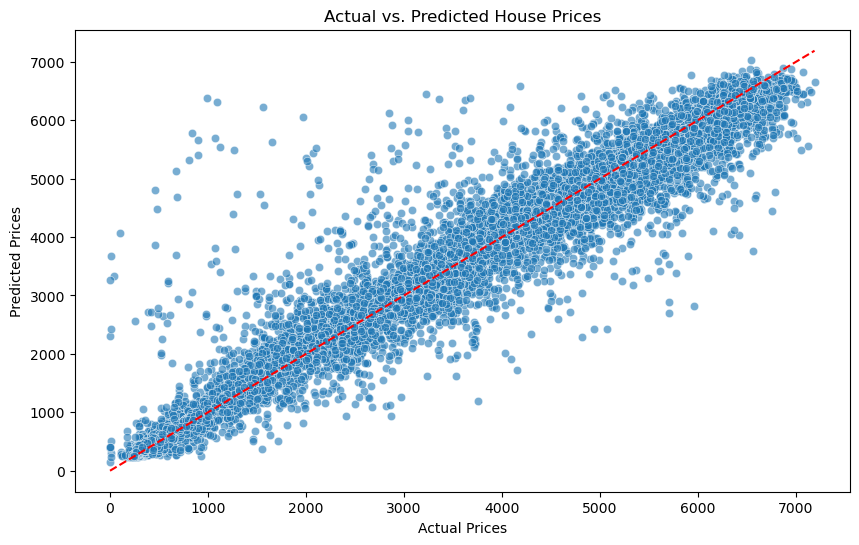

In [34]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')


plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.show()


In [35]:

y_train_pred = rf_model.predict(X_train)

y_test_pred = rf_model.predict(X_test)

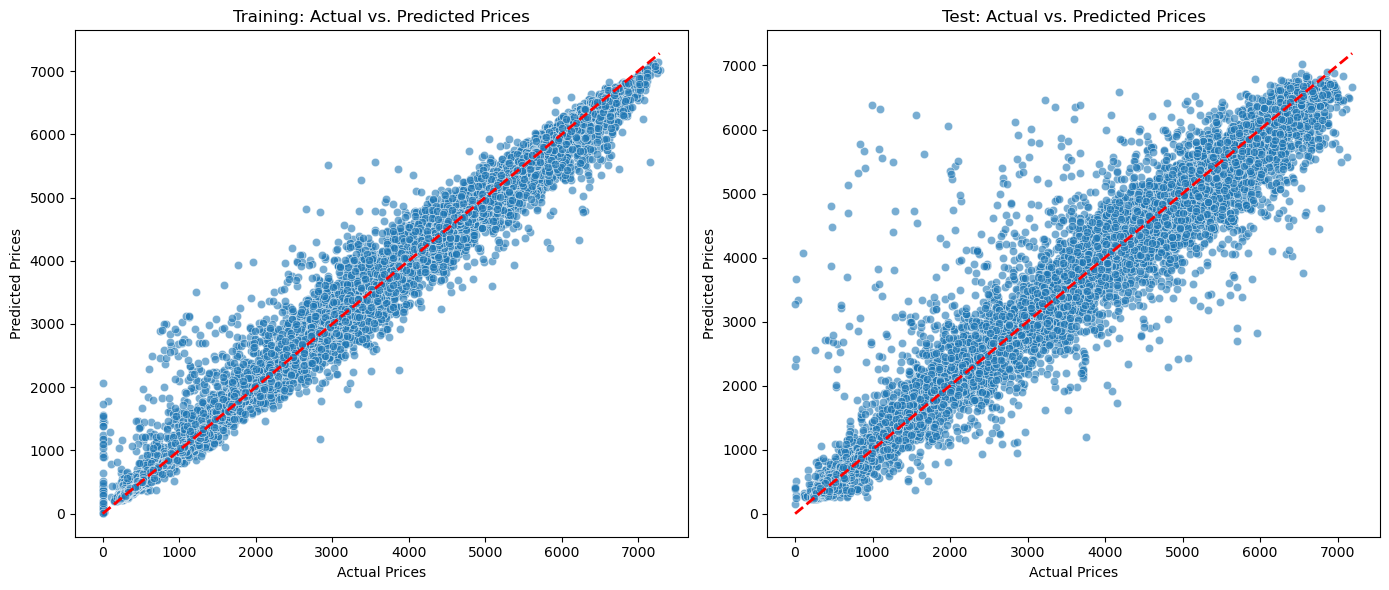

In [36]:
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1) 
sns.scatterplot(x=y_train, y=y_train_pred, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--r', linewidth=2)
plt.title('Training: Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')


plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Test: Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.tight_layout()
plt.show()


In [37]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(rf_model, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.92 (+/- 0.03)


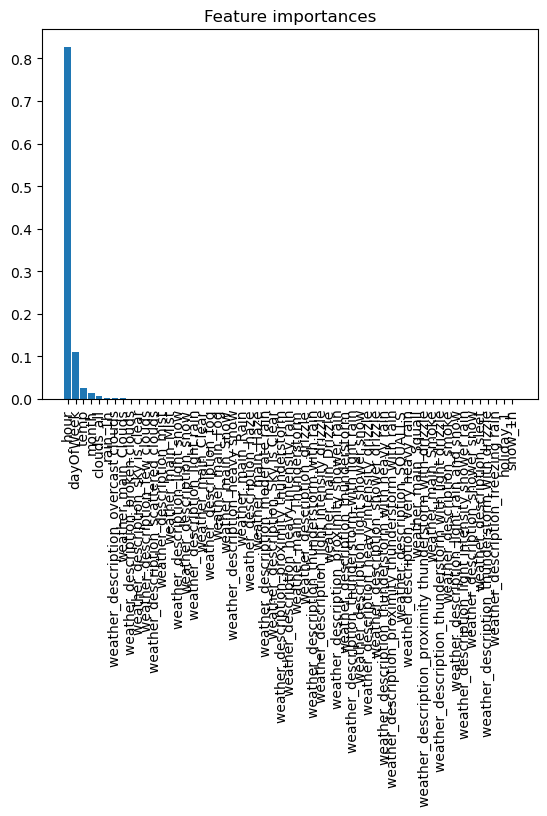

In [38]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()


In [39]:
# Assuming 'indices' is sorted by importance
# Keep top 10 important features for example
X_simplified = X_train[X_train.columns[indices[:10]]]

# Retrain to see the impact
simplified_model = RandomForestRegressor(n_estimators=100, random_state=42)
simplified_model.fit(X_simplified, y_train)
simplified_scores = cross_val_score(simplified_model, X_simplified, y_train, cv=5)
print("Simplified model accuracy: %0.2f (+/- %0.2f)" % (simplified_scores.mean(), simplified_scores.std() * 2))


Simplified model accuracy: 0.94 (+/- 0.01)
